
***Modelos de Machine Learning & Selecionando o Modelo***

Aprendizado supervisionado é onde temos uma label, um "target", um objetivo definido e temos este objetivo para o aprendizado do modelo.

Com o objetivo definido, observamos os dados da variável "target(y)", se tiver uma variável categorica temos um caso de classificação, se tivermos uma variável com dados numericos continuos, temos um caso de regressão linear.

Algoritmos de regressão: Regressão Linear, Random Forest Regressor, Gradient Boosting Regressor, XGBoost Regressor, entre outros, mas sempre com o final regressor.

Algoritmos de classificação: Naive Bayes, Random Forest Classifier, Gradient Boosting Classsifier, XGBoost Classifier, entre outros mas sempre com o final Classifier.

---------------------
---------------------


***O que realizar com este conjunto de dados?***

Análise exploratória - Explore os dados em busca de comportamentos, padrões, dados que precisam ser tratados, excluidos, etc. Use gráficos para te ajudar nesta etapa.

Feature Engineering - Trate os dados que precisam ser ajustados como alteração de texto para numérico, transformações de datas, ajuste de distribuição, etc.

Separe os dados entre treino e teste com a fração de teste que desejar.

Treine um ou mais modelos. Lembre-se que se for usar algum algoritmo como random forest, xgboost, etc use a opção regressor, por exemplo (randomforestregressor).

Teste o seu modelo nos dados de teste e veja a performance do modelo através do R2.

As bibliotecas utilizadas no código fornecido são:

Os: fornece uma maneira de interagir com o sistema operacional,
permitindo a manipulação de caminhos de arquivos, pastas e outras funcionalidades relacionadas ao sistema.

Pandas: é uma biblioteca de análise de dados que fornece estruturas de dados de alto desempenho e fáceis
de usar, além de ferramentas de manipulação e análise de dados.

Matplotlib.pyplot: é uma biblioteca para criação de gráficos e visualizações de dados em Python.

PIL: é a biblioteca Python Imaging Library, que fornece suporte para abrir, manipular e salvar muitos formatos diferentes de imagens.

Numpy: é uma biblioteca numérica em Python que fornece suporte para trabalhar com arrays e operações matemáticas eficientes.

Gensim: é uma biblioteca de processamento de linguagem natural (PLN) que permite treinar,
carregar e usar modelos de aprendizado de máquina para processamento de texto.

Re: é um módulo Python que fornece operações de correspondência de padrões por meio de expressões regulares.

Nltk: é a biblioteca Natural Language ‘Toolkit’, que fornece ferramentas para processamento de texto e PLN,
como tokenização, segmentação de frases, ‘stop’ words, entre outros.

Seaborn: é uma biblioteca de visualização de dados baseada no matplotlib que fornece uma ‘interface’ de alto nível
para criação de gráficos estatísticos atraentes e informativos.

statsmodels: é uma biblioteca estatística em Python que fornece classes e funções para estimar modelos estatísticos,
realizar testes estatísticos e explorar dados estatísticos.

Wordcloud: é uma biblioteca para criação de nuvens de palavras a partir de textos.

# Atividade 2

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import gensim
import re
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from pprint import pprint
from wordcloud import WordCloud
import logging
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_log_error
import statsmodels.api as sm
from xgboost import XGBRegressor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mathe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
#Lê o arquivo único do 1° Exercício
df = pd.read_csv("C:/Treinamento-Data-Science/Atividade 1/df_full.csv")
df.shape

C:\Users\mathe\AppData\Local\Temp\ipykernel_1552\3086869833.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Treinamento-Data-Science/Atividade 1/df_full.csv")


(1206072, 23)

In [4]:
df.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
676687,2014,2014-10-15 17:22:21.000,2014-07-29 15:19:20.000,2,Nordeste,PB,ATACADÃO DOS ELETRODOMESTICOS DO NORDESTE - LTDA,ATACADÃO DOS ELETROS,1,7.012066e+13,70120662.0,ATACADAO DOS ELETRODOMESTICOS DO NORDESTE LTDA,ATACADAO DOS ELETROS,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,S,119,"Material de Escritório / Escola ( Arquivo, Bor...",105.0,Produto com vício,F,entre 31 a 40 anos,58070390.0
834898,2015,2015-11-16 13:19:34.000,2015-06-30 08:21:26.000,3,Sudeste,SP,FRANCISCO CARLOS FERREIRA JOGOS ELETRONICOS,CONEXAO GAMES,1,1.145517e+13,11455171.0,FRANCISCO CARLOS FERREIRA JOGOS ELETRONICOS,CONEXAO GAMES,4763601.0,COMÉRCIO VAREJISTA DE BRINQUEDOS E ARTIGOS REC...,N,140,Eletroeletrônico Importado,105.0,Produto com vício,M,entre 31 a 40 anos,14470972.0
1161753,2016,2016-03-17 10:42:35.000,2016-02-03 15:56:21.000,2,Nordeste,RN,CLARO S.A.,CLARO S.A.,1,4.043254e+13,40432544.0,CLARO S.A.,NaN,6120501.0,TELEFONIA MÓVEL CELULAR,S,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,M,entre 41 a 50 anos,59031280.0
807784,2015,2015-07-30 18:32:15.000,2015-05-15 16:01:10.000,3,Sudeste,SP,MARCELO RAMOS DE OLIVEIRA INFORMATICA ME,FOX SOLUÇÕES JURÍDICIAS/FOX ASSESSORIA DE CRÉDITO,1,7.451274e+12,7451274.0,MARCELO RAMOS DE OLIVEIRA - INFORMATICA - ME,FOX - ASSESSORIA DE CREDITO,4751201.0,NaN,N,258,Consultoria / Assessoria / Agenciamento ( Reco...,184.0,Serviço não fornecido (entrega/instalação/não ...,M,entre 41 a 50 anos,5756220.0
744581,2014,2014-01-21 08:39:04.000,2013-10-17 13:43:30.000,4,Sul,PR,SPACE TECH IND.COM.IMP.EXP. DE EQUIP. INFORM.,SPACE TECH,1,7.660698e+12,7660698.0,SPACE TECH INDUSTRIA COMERCIO IMPORTACAO EXPOR...,SPACE TECH,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,105.0,Produto com vício,F,até 20 anos,81870660.0


In [5]:
# Sample de Somente 1000 Linhas do Arquivo
df_2 = df.sample(1000)
df_2 = df_2.replace({np.nan:""})

# Início da Tokenização
texto=[]
for i in df_2['DescricaoProblema']:
  texto.append(i)

otexto = " ".join(texto)
print(otexto)

Duvida sobre cobrança/valor/reajuste/contrato/orçamento. Preço do produto/serviço Produto com vício Defeito/Risco à saúde e segurança Produto com vício Desistência de compra (cancelamento de compra) Garantia (Abrangência, cobertura, etc.) Produto com vício Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Produto com vício Cobrança indevida. Produto entregue diferente do pedido Duvida sobre cobrança/valor/reajuste/contrato/orçamento. Produto com vício Produto com vício Cobrança indevida/abusiva Cobrança indevida. Produto entregue diferente do pedido Não entrega/demora na entrega do produto Cobrança indevida/abusiva Não entrega/demora na entrega do produto Fundo de reserva Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Cobrança indevida. Cobrança indevida. Cobrança indevida/abusiva Contrato (não cumprimento, alteração, transferencia, irregularidade, rescisão, etc.

In [6]:
# Variável com as informações da Coluna "DescricaoProblema" do Dataset
otexto

'Duvida sobre cobrança/valor/reajuste/contrato/orçamento. Preço do produto/serviço Produto com vício Defeito/Risco à saúde e segurança Produto com vício Desistência de compra (cancelamento de compra) Garantia (Abrangência, cobertura, etc.) Produto com vício Cobrança indevida/abusiva Garantia (Abrangência, cobertura, etc.) Produto com vício Cobrança indevida. Produto entregue diferente do pedido Duvida sobre cobrança/valor/reajuste/contrato/orçamento. Produto com vício Produto com vício Cobrança indevida/abusiva Cobrança indevida. Produto entregue diferente do pedido Não entrega/demora na entrega do produto Cobrança indevida/abusiva Não entrega/demora na entrega do produto Fundo de reserva Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Serviço não fornecido (entrega/instalação/não cumprimento da oferta/contrato) Cobrança indevida. Cobrança indevida. Cobrança indevida/abusiva Contrato (não cumprimento, alteração, transferencia, irregularidade, rescisão, etc

In [7]:
# Limpa a pontuação e números
tokenizer = RegexpTokenizer(r'[A-z]\w*')

# Limpando a Variável
tokens = tokenizer.tokenize(otexto)

# Resultado
print(tokens)

['Duvida', 'sobre', 'cobrança', 'valor', 'reajuste', 'contrato', 'orçamento', 'Preço', 'do', 'produto', 'serviço', 'Produto', 'com', 'vício', 'Defeito', 'Risco', 'saúde', 'e', 'segurança', 'Produto', 'com', 'vício', 'Desistência', 'de', 'compra', 'cancelamento', 'de', 'compra', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'abusiva', 'Garantia', 'Abrangência', 'cobertura', 'etc', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'Produto', 'entregue', 'diferente', 'do', 'pedido', 'Duvida', 'sobre', 'cobrança', 'valor', 'reajuste', 'contrato', 'orçamento', 'Produto', 'com', 'vício', 'Produto', 'com', 'vício', 'Cobrança', 'indevida', 'abusiva', 'Cobrança', 'indevida', 'Produto', 'entregue', 'diferente', 'do', 'pedido', 'Não', 'entrega', 'demora', 'na', 'entrega', 'do', 'produto', 'Cobrança', 'indevida', 'abusiva', 'Não', 'entrega', 'demora', 'na', 'entrega', 'do', 'produto', 'Fundo', 'de', 'reserva', 'Serviço', 'não', 'fornecido', 'ent

C:\Users\mathe\AppData\Local\Temp\ipykernel_1552\826148323.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_2['AnoCalendario'])


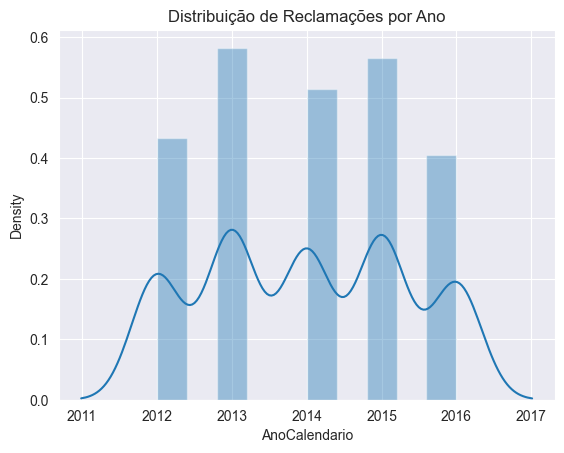

In [8]:
# Gráfico para verificar a frequência de Reclamações
sns.distplot(df_2['AnoCalendario'])
plt.title('Distribuição de Reclamações por Ano')
plt.show()

In [9]:
# Ajustando 0 "datatype" das colunas "DataAbertura" e "DataArquivamento"
df_2['DataAbertura'] = pd.to_datetime(df_2['DataAbertura'])
df_2['DataArquivamento'] = pd.to_datetime(df_2['DataArquivamento'])
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor
197899,2012,2012-08-29 09:11:27,2011-12-19 13:10:48,5,Centro-oeste,MS,"AYMORE CREDITO, FINANCIAMENTO E INVESTIMENTO S.A.",AYMORE CFI,1,7707650000110.0,7707650.0,"AYMORE CREDITO, FINANCIAMENTO E INVESTIMENTO S.A.",AYMORE CFI,6436100.0,"SOCIEDADES DE CRÉDITO, FINANCIAMENTO E INVESTI...",S,63,Financeira,50.0,Consumidor negativado indevidamente nos serviç...,F,entre 61 a 70 anos,79092480
602587,2014,2014-12-11 09:12:23,2014-06-25 09:12:24,3,Sudeste,SP,GENERAL MOTORS DO BRASIL LTDA,GM CHEVROLET,1,59275792000150.0,59275792.0,GENERAL MOTORS DO BRASIL LTDA,,2910701.0,"FABRICAÇÃO DE AUTOMÓVEIS, CAMIONETAS E UTILITÁ...",N,129,Carro Nacional Zero ( Montadora ),113.0,Falta de peca de reposição,F,entre 41 a 50 anos,11050280.0
552428,2014,2014-10-02 15:27:46,2014-09-02 10:38:38,4,Sul,SC,TELEFONICA BRASIL S.A.,TELEFÔNICA,1,2558157000162.0,2558157.0,TELEFONICA BRASIL S.A.,,6110801.0,SERVIÇOS DE TELEFONIA FIXA COMUTADA - STFC,S,186,Telefonia Fixa ( Plano de Expansão / Compra e ...,241.0,"SAC - Cancelamento de serviço (retenção, demor...",F,entre 21 a 30 anos,88070170.0
364158,2013,2013-11-28 13:38:10,2013-08-13 18:12:48,3,Sudeste,SP,TNL PCS S/A,OI CELULAR/OI MÓVEL,1,4164616000159.0,4164616.0,TNL PCS S/A,,6120501.0,TELEFONIA MÓVEL CELULAR,S,187,Telefonia Celular,134.0,Cobrança indevida/abusiva,F,Nao Informada,3118040.0
118284,2012,2012-02-02 14:07:46,2011-12-26 15:58:08,2,Nordeste,RN,DRICOS MÓVEIS E ELETRODOMÉSTICOS LTDA,RABELO,1,4980258001477.0,4980258.0,DRICOS MOVEIS E ELETRODOMESTICOS LTDA,1,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,S,96,Televisão / Vídeo Cassete / Filmadora / Video-...,102.0,"Garantia (Abrangência, cobertura, etc.)",M,entre 31 a 40 anos,59600000


In [10]:
# Criando Coluna de DiaAbertura e DiaArquivamento
df_2['DiaAbertura'] = df_2['DataAbertura'].dt.day_name()
df_2['DiaArquivamento'] = df_2['DataArquivamento'].dt.day_name()
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento
726183,2014,2014-09-02 14:16:23,2014-07-03 09:35:11,3,Sudeste,SP,LENOVO TECNOLOGIA BRASIL LTDA,,1,7275920000161.0,7275920.0,LENOVO TECNOLOGIA (BRASIL) LIMITADA,,2621300.0,FABRICAÇÃO DE EQUIPAMENTOS DE INFORMÁTICA,S,102,Microcomputador / Produtos de Informática,105.0,Produto com vício,M,entre 31 a 40 anos,5891280.0,Thursday,Tuesday
152467,2012,2012-11-22 07:57:20,2011-08-17 11:25:33,3,Sudeste,RJ,RICARDO ELETRO DIVINOPOLIS LTDA,"RICARDO ELETRO.COM (CITYLAR, INSINUANTE, TRICO...",1,64282601020142.0,64282601.0,RICARDO ELETRO DIVINOPOLIS LTDA,RICARDO ELETRO,4753900.0,COMÉRCIO VAREJISTA ESPECIALIZADO DE ELETRODOMÉ...,N,92,Máquina de Lavar Roupa / Louça e Secadora,107.0,Não entrega/demora na entrega do produto,M,entre 41 a 50 anos,21530030,Wednesday,Thursday
283697,2013,2013-05-03 11:07:40,2012-01-23 16:52:08,2,Nordeste,BA,ASSURANT SEGURADORA S.A.,ASSURANT SEGURADORA,1,3823704000152.0,3823704.0,ASSURANT SEGURADORA S.A.,,6511101.0,SEGUROS DE VIDA,N,122,Móveis Para Quarto,102.0,"Garantia (Abrangência, cobertura, etc.)",F,entre 21 a 30 anos,42806050.0,Monday,Friday
882834,2015,2015-12-21 18:32:43,2015-11-19 00:56:52,3,Sudeste,SP,UNIMED PAULISTANA SOC COOPERATIVA DE TRABALHO ...,,1,43202472000130.0,43202472.0,UNIMED PAULISTANA SOC COOPERATIVA DE TRABALHO ...,EST UNIF,6550200.0,PLANOS DE SAÚDE,N,284,Plano de saúde regulamentado,149.0,Outros problemas com contratos de saúde (Não c...,,Nao Informada,2143030.0,Thursday,Monday
1143650,2016,2016-09-22 08:34:51,2016-05-19 13:50:49,2,Nordeste,BA,OI MOVEL S.A.,OI,1,5423963000111.0,5423963.0,OI MOVEL S.A.,OI,6120501.0,TELEFONIA MÓVEL CELULAR,S,101,"Telefone ( Convencional, Celular, Interfone, E...",120.0,Cobrança de valor quando o produto e devolvido...,F,entre 61 a 70 anos,40243390.0,Thursday,Thursday


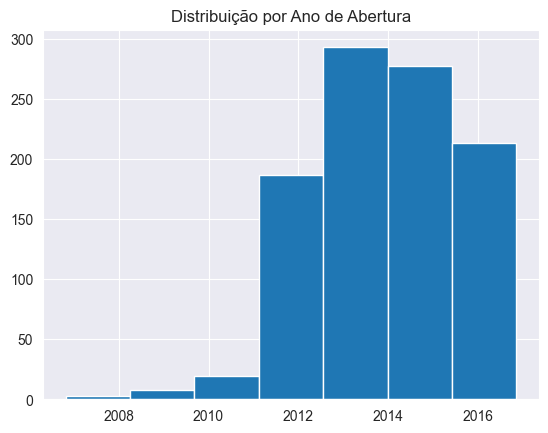

In [11]:
# A quantidade de Reclamações abertas por ano
plt.hist(df_2['DataAbertura'], bins=7)
plt.title('Distribuição por Ano de Abertura')
plt.show()

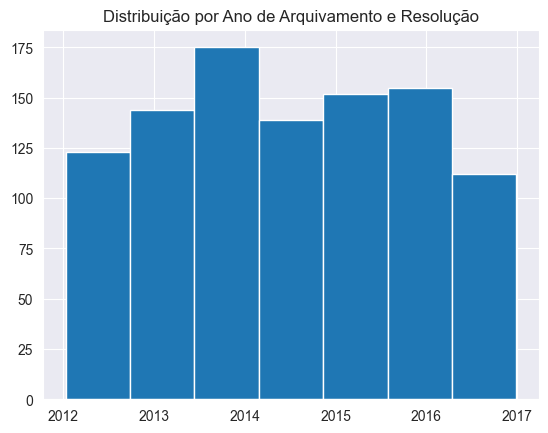

In [12]:
# A quantidade de Reclamações Arquivadas / Solucionadas por ano
plt.hist(df_2['DataArquivamento'], bins=7)
plt.title('Distribuição por Ano de Arquivamento e Resolução')
plt.show()

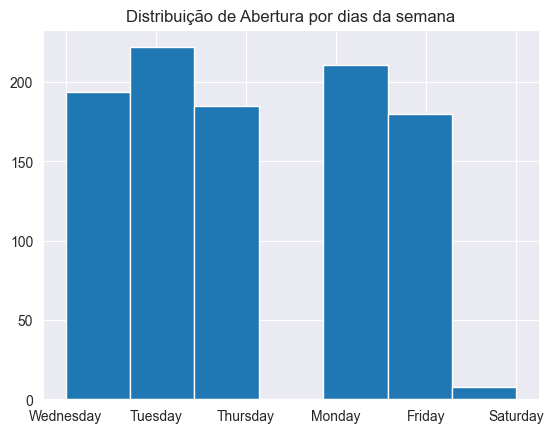

In [13]:
# A Quantidade de reclamações por dia da semana
plt.hist(df_2['DiaAbertura'], bins=7)
plt.title('Distribuição de Abertura por dias da semana')
plt.show()

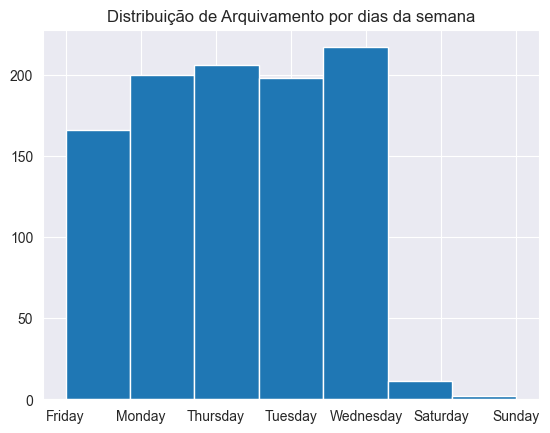

In [14]:
# A quantidade de Arquivamento / Resoluções por dia da semana
plt.hist(df_2['DiaArquivamento'], bins=7)
plt.title('Distribuição de Arquivamento por dias da semana')
plt.show()

In [15]:
#Cria as colunas Minuto, Hora, Dia, Semana, Mês e Ano no DataSet

df_2['MinutoAbertura'] = df_2['DataAbertura'].dt.minute
df_2['HoraAbertura'] = df_2['DataAbertura'].dt.hour
df_2['DiaAbertura'] = df_2['DataAbertura'].dt.day
df_2['SemanaAbertura'] = df_2['DataAbertura'].dt.weekday
df_2['MesAbertura'] = df_2['DataAbertura'].dt.month
df_2['AnoAbertura'] = df_2['DataAbertura'].dt.year

In [16]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura
708201,2014,2014-03-10 10:57:20,2014-02-05 10:55:27,2,Nordeste,PE,KABUM COMÉRCIO ELETRONICO,KABUM CMÉRCIO ELETRONICO,1,,,,,,,S,125,Aquecedor / Ventilador / Ar Condicionado / Cir...,107.0,Não entrega/demora na entrega do produto,M,entre 21 a 30 anos,56800000.0,5,Monday,55,10,2,2,2014
357625,2013,2013-10-09 13:57:50,2012-01-25 12:02:50,3,Sudeste,ES,UNIBANCO SEGUROS S.A.,GARANTECH GARANTIAS,1,33166158000195.0,33166158.0,UNIBANCO SEGUROS S.A.,,6512000.0,SEGUROS NÃO-VIDA,S,92,Máquina de Lavar Roupa / Louça e Secadora,105.0,Produto com vício,F,entre 21 a 30 anos,29142120.0,25,Wednesday,2,12,2,1,2012
535878,2014,2014-02-07 09:22:21,2013-10-30 17:04:09,4,Sul,PR,CALHAS GASTAO,CALHAS GASTAO,1,,,,,,,S,253,Construção / Reforma / Montagem / Acabamento,185.0,Serviço não concluído /Fornecimento parcial,F,Nao Informada,82600020.0,30,Friday,4,17,2,10,2013
543116,2014,2014-07-16 11:27:55,2014-07-01 15:31:15,3,Sudeste,RJ,COMPANHIA ESTADUAL DE AGUAS E ESGOTOS CEDAE,CEDAE,1,33352394000104.0,33352394.0,COMPANHIA ESTADUAL DE AGUAS E ESGOTOS CEDAE,,3600601.0,"CAPTAÇÃO, TRATAMENTO E DISTRIBUIÇÃO DE ÁGUA",N,183,Água / Esgoto,134.0,Cobrança indevida/abusiva,F,entre 41 a 50 anos,20271280.0,1,Wednesday,31,15,1,7,2014
371439,2013,2013-12-04 15:41:27,2013-10-08 14:03:41,3,Sudeste,SP,BANCO BRADESCO FINANCIAMENTOS S/A,,1,7207996000150.0,7207996.0,BANCO BRADESCO FINANCIAMENTOS S.A.,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,250.0,Crédito Consignado,M,entre 61 a 70 anos,8255120.0,8,Wednesday,3,14,1,10,2013


In [17]:
# Verificando os DTypes do DataSet
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 869415 to 1054773
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   AnoCalendario          1000 non-null   int64         
 1   DataArquivamento       1000 non-null   datetime64[ns]
 2   DataAbertura           1000 non-null   datetime64[ns]
 3   CodigoRegiao           1000 non-null   int64         
 4   Regiao                 1000 non-null   object        
 5   UF                     1000 non-null   object        
 6   strRazaoSocial         1000 non-null   object        
 7   strNomeFantasia        1000 non-null   object        
 8   Tipo                   1000 non-null   int64         
 9   NumeroCNPJ             1000 non-null   object        
 10  RadicalCNPJ            1000 non-null   object        
 11  RazaoSocialRFB         1000 non-null   object        
 12  NomeFantasiaRFB        1000 non-null   object        
 13  

In [18]:
# Calcula a diferença de tempo entre a DataArquivamento - DataAbertura
# Para saber quanto tempo a reclamação demorou para ser atendida
df_2 = df_2.sample(100)
df_2['datediff'] = df_2['DataArquivamento'] - df_2['DataAbertura']

In [19]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
683024,2014,2014-07-08 09:32:39,2012-03-28 09:09:08,1,Norte,PA,ELETRO BRASIL COMERCIO DE MOVEIS LTDA ME,ELETRO BRASIL PREMIOS,1,9307527000219.0,9307527.0,ELETRO BRASIL COMERCIO DE MOVEIS LTDA - ME,ELETRO BRASIL PREMIOS,4754701.0,COMÉRCIO VAREJISTA DE MÓVEIS,S,71,Venda Programada,47.0,Venda enganosa,M,entre 21 a 30 anos,66630480.0,28,Tuesday,9,9,2,3,2012,832 days 00:23:31
741762,2014,2014-05-08 10:10:41,2014-02-18 15:27:40,1,Norte,TO,CARNEIRO E BICHUETE S/S LTDA,COIFE ODONTO CLINICAS ODONTOLOGICAS,1,8519161000106.0,8519161.0,BICHUETE E BICHUETE LTDA - EPP,COIFE ODONTO CLINICAS ODONTOLOGICAS,8630504.0,ATIVIDADE ODONTOLÓGICA COM RECURSOS PARA REALI...,S,286,Plano Odontológico,179.0,Cobrança de multa acima do permitido pela legi...,F,entre 21 a 30 anos,77826534.0,18,Thursday,27,15,1,2,2014,78 days 18:43:01
45100,2012,2012-07-31 14:26:36,2012-03-29 10:38:17,3,Sudeste,SP,BANCO SAFRA S/A,,1,58160789000128.0,58160789.0,BANCO SAFRA S A,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,53,Banco comercial,28.0,Cobrança indevida.,F,Nao Informada,06857520,29,Tuesday,38,10,3,3,2012,124 days 03:48:19
616571,2014,2014-01-16 10:39:16,2013-02-27 11:22:09,1,Norte,AM,"IBI ADM E PROMOTORA LTDA-(IBICARD, IBICARD C&A)",IBI ADMINISTRADORA E PROMOTORA LTDA,1,74481201000194.0,74481201.0,IBI PROMOTORA DE VENDAS LTDA.,,7490104.0,ATIVIDADES DE INTERMEDIAÇÃO E AGENCIAMENTO DE ...,S,55,Cartão de Loja,28.0,Cobrança indevida.,F,entre 31 a 40 anos,69087658.0,27,Thursday,22,11,2,2,2013,322 days 23:17:07
193752,2012,2012-03-28 15:13:05,2012-03-09 17:46:36,4,Sul,SC,BANCO ITAUCARD S.A.,ITAUCARD/UNICARD/CREDICARDITAÚ/CREDICARDTAM/DI...,1,17192451000170.0,17192451.0,BANCO ITAUCARD S.A.,ITAUCARD FINANCEIRA,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",N,63,Financeira,28.0,Cobrança indevida.,M,entre 31 a 40 anos,88090430,9,Wednesday,46,17,4,3,2012,18 days 21:26:29


In [20]:
# Deu certo com "W - Weeks", mas tentei mudar para "M - Months" e gerou erro
import numpy as np
df_2['datediff'] = df_2['datediff']/np.timedelta64(1, 'M') # D para dias, W para semanas e M para mês
df_2['datediff']

1056270     0.128617
1172659     0.421916
887407      5.607129
185823      0.736628
1104451     4.518190
752649      1.830925
20691       2.348943
76926      19.875908
714029      1.419829
590497      1.714241
230110     38.635481
221951      3.553091
204770      1.133480
348848      6.311495
579503      5.615000
476552      4.618316
971211      5.646098
764377      1.045459
1139972    13.807594
740396      4.066209
263972      2.993644
683024     26.839236
881845      0.644885
1076860     0.902041
1033805     2.324188
542793      0.482785
881429      0.768717
221093      5.878116
741762      2.541286
268692      0.903142
853900      3.192811
991122      3.190824
539720      5.195279
38563       0.683530
222344      2.258864
616571     10.418394
1102719    34.089951
609551      6.097042
970360      2.780690
771872      3.269969
294535      2.323823
536128      3.096979
279694      1.871986
823902      2.933331
627387      6.902820
433136      0.988130
42583      19.162821
196604      1

In [21]:
df_2.sample(5)

,AnoCalendario,DataArquivamento,DataAbertura,CodigoRegiao,Regiao,UF,strRazaoSocial,strNomeFantasia,Tipo,NumeroCNPJ,RadicalCNPJ,RazaoSocialRFB,NomeFantasiaRFB,CNAEPrincipal,DescCNAEPrincipal,Atendida,CodigoAssunto,DescricaoAssunto,CodigoProblema,DescricaoProblema,SexoConsumidor,FaixaEtariaConsumidor,CEPConsumidor,DiaAbertura,DiaArquivamento,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
268692,2013,2013-03-25 15:31:07,2013-02-25 15:34:51,3,Sudeste,ES,DLD COMERCIO VAREJISTA LTDA,DADALTO,1,27179753001487.0,27179753.0,DLD COMERCIO VAREJISTA LTDA,DADALTO,4713001.0,LOJAS DE DEPARTAMENTOS OU MAGAZINES,N,102,Microcomputador / Produtos de Informática,109.0,Publicidade enganosa,F,entre 31 a 40 anos,,25,Monday,34,15,0,2,2013,0.903142
348848,2013,2013-04-02 08:38:13,2012-09-18 16:53:06,3,Sudeste,MG,BANCO BMG SA,BANCO BMG,1,61186680000174.0,61186680.0,BANCO BMG SA,,6422100.0,"BANCOS MÚLTIPLOS, COM CARTEIRA COMERCIAL",S,53,Banco comercial,217.0,Antecipação de Financiamento,M,entre 51 a 60 anos,35180360.0,18,Tuesday,53,16,1,9,2012,6.311495
740396,2014,2014-07-01 17:25:32,2014-02-25 16:09:59,1,Norte,TO,D&L SERVICOS DE INTERMED DE NEG E SOLUCÕES WEB...,PANK.COM.BR,1,14237822000103.0,14237822.0,D&L SERVICOS DE INTERMEDIACAO DE NEGOCIOS E SO...,,6319400.0,"PORTAIS, PROVEDORES DE CONTEÚDO E OUTROS SERVI...",S,90,"Acessório Para Vestuário ( Bolsa, Cinto, Chapé...",107.0,Não entrega/demora na entrega do produto,M,até 20 anos,77022372.0,25,Tuesday,9,16,1,2,2014,4.066209
432236,2013,2013-09-17 09:55:17,2013-07-12 10:25:27,3,Sudeste,SP,ARTHUR LUNDGREEN TECIDOS S/A,PERNAMBUCANAS,1,,,,,,,S,55,Cartão de Loja,28.0,Cobrança indevida.,F,entre 21 a 30 anos,11660000.0,12,Tuesday,25,10,4,7,2013,2.160615
40350,2012,2012-11-27 16:09:49,2012-07-12 08:28:02,3,Sudeste,SP,TIM CELULAR S/A,TIM CELULAR,1,4206050000180.0,4206050.0,TIM CELULAR S.A.,,6120501.0,TELEFONIA MÓVEL CELULAR,S,187,Telefonia Celular,123.0,"Vicio de qualidade (mal executado, inadequado,...",F,entre 31 a 40 anos,05781150,12,Tuesday,28,8,3,7,2012,4.461958


# Atividade 3

In [22]:
# Transformação para o horário em que foi aberta a reclamação e ver qual periodo do dia 
df_2['PeriodoDia'] = df_2.HoraAbertura.apply(lambda y: (y % 24 + 4)//4).replace({
    1:'Madrugada',
    2:'Cedo da Manhã',
    3:'Manhã',
    4:'Tarde',
    5:'Inicio da Noite',
    6:'Tarde da Noite'
})

In [23]:
# Antes do DROP
df_2.columns

Index(['AnoCalendario', 'DataArquivamento', 'DataAbertura', 'CodigoRegiao',
       'Regiao', 'UF', 'strRazaoSocial', 'strNomeFantasia', 'Tipo',
       'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB',
       'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida', 'CodigoAssunto',
       'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema',
       'SexoConsumidor', 'FaixaEtariaConsumidor', 'CEPConsumidor',
       'DiaAbertura', 'DiaArquivamento', 'MinutoAbertura', 'HoraAbertura',
       'SemanaAbertura', 'MesAbertura', 'AnoAbertura', 'datediff',
       'PeriodoDia'],
      dtype='object')

In [27]:
# O argumento AXIS especifica se as linhas(0) ou colunas (1) devem ser descartadas
# O argumento INPLACE especifica a remoção das colunas sem reatribuir o dataframe (persiste em memória a alteração)
cols = ['Unnamed: 0', 'CodigoRegiao', 'Regiao', 'strRazaoSocial', 'strNomeFantasia',
       'Tipo', 'NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB', 'CNAEPrincipal', 'DescCNAEPrincipal', 'Atendida',
       'CodigoAssunto', 'DescricaoAssunto', 'CodigoProblema', 'DescricaoProblema', 'SexoConsumidor', 'FaixaEtariaConsumidor',
       'CEPConsumidor', 'UF', 'DataAbertura']
df.drop(cols, axis=1, inplace=True)

In [30]:
# Drop das Colunas que não utilizaremos
df_2.drop('Unnamed: 0', axis=1, inplace=True)
df_2.drop('CodigoRegiao', axis=1, inplace=True)
df_2.drop('Regiao', axis=1, inplace=True)
df_2.drop('strRazaoSocial', axis=1, inplace=True)
df_2.drop('strNomeFantasia', axis=1, inplace=True)
df_2.drop('Tipo', axis=1, inplace=True)
df_2.drop('NumeroCNPJ', axis=1, inplace=True)
df_2.drop('RadicalCNPJ', axis=1, inplace=True)
df_2.drop('RazaoSocialRFB', axis=1, inplace=True)
df_2.drop('NomeFantasiaRFB', axis=1, inplace=True)
df_2.drop('CNAEPrincipal', axis=1, inplace=True)
df_2.drop('DescCNAEPrincipal', axis=1, inplace=True)
df_2.drop('Atendida', axis=1, inplace=True)
df_2.drop('CodigoAssunto', axis=1, inplace=True)
df_2.drop('DescricaoAssunto', axis=1, inplace=True)
df_2.drop('CodigoProblema', axis=1, inplace=True)
df_2.drop('DescricaoProblema', axis=1, inplace=True)
df_2.drop('SexoConsumidor', axis=1, inplace=True)
df_2.drop('FaixaEtariaConsumidor', axis=1, inplace=True)
df_2.drop('CEPConsumidor', axis=1, inplace=True)
df_2.drop('UF', axis=1, inplace=True)
df_2.drop('DiaArquivamento', axis=1, inplace=True)
df_2.drop('DataAbertura', axis=1, inplace=True)
df_2.drop('DataArquivamento', axis=1, inplace=True)
df_2.drop('PeriodoDia', axis=1, inplace=True)

In [31]:
# Depois do DROP
df_2.columns

Index(['AnoCalendario', 'DiaAbertura', 'MinutoAbertura', 'HoraAbertura',
       'SemanaAbertura', 'MesAbertura', 'AnoAbertura', 'datediff'],
      dtype='object')

In [33]:
# Verificando o DataSet novamente
df_2.sample(3)

,AnoCalendario,DiaAbertura,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
715537,2014,18,18,16,4,10,2013,7.453682
1144869,2016,9,39,9,2,3,2016,0.744668
21195,2012,10,13,9,1,4,2012,3.630372


In [34]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1056270 to 38353
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AnoCalendario   100 non-null    int64  
 1   DiaAbertura     100 non-null    int32  
 2   MinutoAbertura  100 non-null    int32  
 3   HoraAbertura    100 non-null    int32  
 4   SemanaAbertura  100 non-null    int32  
 5   MesAbertura     100 non-null    int32  
 6   AnoAbertura     100 non-null    int32  
 7   datediff        100 non-null    float64
dtypes: float64(1), int32(6), int64(1)
memory usage: 4.7 KB


In [35]:
# Separação entre variáveis independentes e dependente
y = df_2['datediff']
X = df_2.drop('datediff', axis=1)

In [36]:
 # Separa entre treino e “test” com 30% de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54545)

In [37]:
# Modelo com XGBoost Regressor 
from xgboost import XGBRegressor # -> Importa o algoritmo do XGBoost

In [38]:
# Instancia o XGBRegressor com Parametros Padrão
xgb_model = XGBRegressor() 

In [39]:
df_2.sample(3)

,AnoCalendario,DiaAbertura,MinutoAbertura,HoraAbertura,SemanaAbertura,MesAbertura,AnoAbertura,datediff
109348,2012,14,25,13,1,8,2012,3.449275
1077845,2016,4,26,13,3,8,2016,1.513657
95056,2012,20,56,12,1,3,2012,1.098698


In [40]:
# Treinamento do modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [41]:
# Realiza a predição em dados desconhecidos
y_pred = xgb_model.predict(X_test)

In [42]:
# Compara o valor real(y_test) e o valor predito(y_pred) e gera o R² que geralmente varia de 0 a 100 
r2_score(y_test, y_pred)

-0.1856194129411115

In [43]:
# Modelo com Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [44]:
# Instancia o random forest regressor com parametros padrão
rf_model = RandomForestRegressor()

In [45]:
# Treinamento do modelo
rf_model.fit(X_train, y_train) 

RandomForestRegressor()

In [46]:
y_pred = rf_model.predict(X_test)

In [47]:
r2_score(y_test, y_pred)

0.029064522724968733

In [48]:
# Tuning de parametros
n_estimators = [100, 150, 200, 250, 350, 400]
min_samples_split = [2, 6, 10]
min_samples_leaf = [2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None]

parametros = {
    'n_estimators':n_estimators,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'max_features':max_features
}

In [49]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

In [50]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

In [51]:
gb_tuned = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=37), 
                              param_distributions=parametros, 
                              cv=5, # Validação cruzada com 5 folds
                              n_iter=15,  # Interações
                              n_jobs=-1, # usa todos os processadores
                              verbose=1) # Exibe saida? 
gb_tuned.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mathe\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=37),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [100, 150, 200, 250,
                                                         350, 400]},
                   verbose=1)

In [52]:
# Realiza a predição em dados desconhecidos
y_pred = gb_tuned.predict(X_test)

In [53]:
# Compara o valor real(y_test) e o valor predito(y_pred) e gera o R² que geralmente varia de 0 a 100
r2_score(y_test, y_pred)

0.22061659435800673

In [54]:
# Salva o modelo para uso posterior
import pickle 

pickle.dump(gb_tuned, open('gb_tuned.pkl', 'wb'))